In [1]:
import gymnasium as gym
import numpy as np
import tqdm
from matplotlib import pyplot as plt
import json
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.interpolate import griddata

In [22]:
hyper_params_list = []
with open('data/varying_e.json') as f:
    hyper_params_list = json.load(f)

In [23]:
best = max(hyper_params_list, key=lambda x: (x["avg_rewards"], -x["avg_steps"]))

In [24]:
best

{'learning_rate': 0.44,
 'epsilon': 0.14,
 'min_epsilon': 0.01,
 'decay_rate': 0.01,
 'discount_factor': 0.64,
 'avg_steps': 12.2,
 'avg_rewards': 8.8}

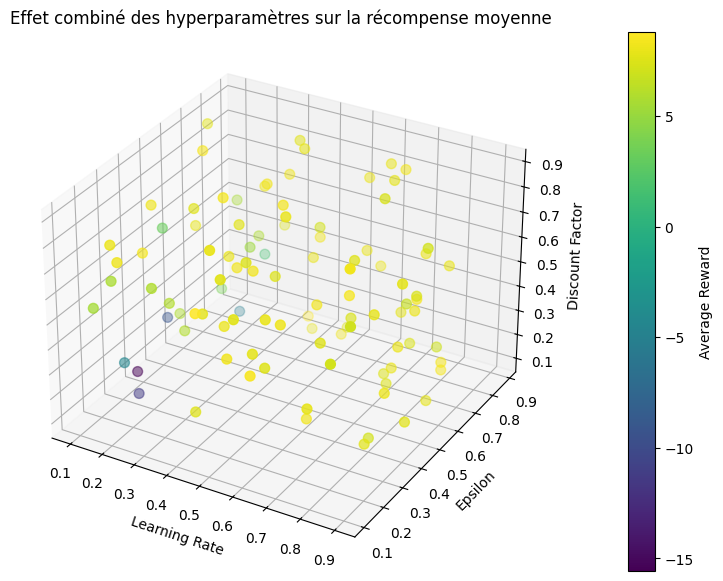

In [25]:
learning_rates = [hp['learning_rate'] for hp in hyper_params_list]
epsilons = [hp['epsilon'] for hp in hyper_params_list]
gammas = [hp['discount_factor'] for hp in hyper_params_list]
avg_rewards = [hp['avg_rewards'] for hp in hyper_params_list]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(learning_rates, epsilons, gammas, c=avg_rewards, cmap='viridis', s=50)

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Average Reward')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Discount Factor')
ax.set_title('Effet combiné des hyperparamètres sur la récompense moyenne')

plt.show()

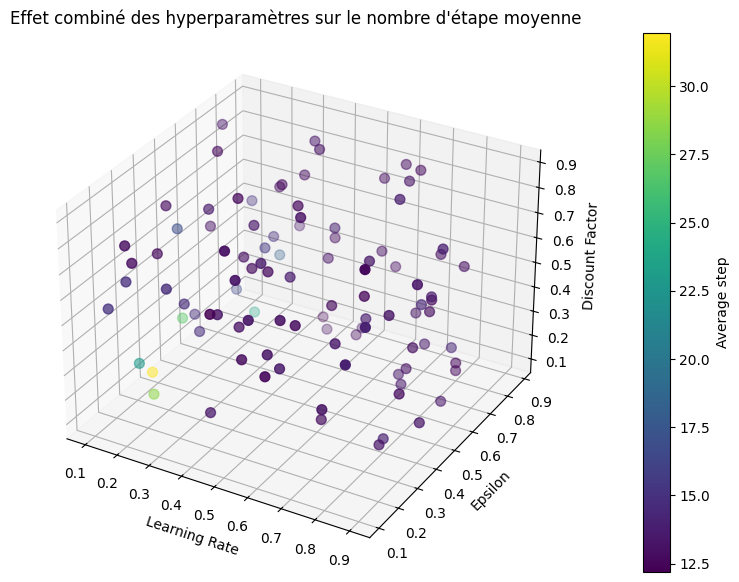

In [26]:
learning_rates = [hp['learning_rate'] for hp in hyper_params_list]
epsilons = [hp['epsilon'] for hp in hyper_params_list]
gammas = [hp['discount_factor'] for hp in hyper_params_list]
avg_steps = [hp['avg_steps'] for hp in hyper_params_list]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(learning_rates, epsilons, gammas, c=avg_steps, cmap='viridis', s=50)

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Average step')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Discount Factor')
ax.set_title("Effet combiné des hyperparamètres sur le nombre d'étape moyenne")

plt.show()

In [27]:
df = pd.DataFrame(hyper_params_list)

df_sorted = df.sort_values(by="avg_rewards", ascending=False)

top_10 = df_sorted.head(10)
print("Top 10 combinaisons selon la récompense moyenne :\n")
print(top_10.to_string(index=False))

Top 10 combinaisons selon la récompense moyenne :

 learning_rate  epsilon  min_epsilon  decay_rate  discount_factor  avg_steps  avg_rewards
          0.44     0.14         0.01        0.01             0.64      12.20         8.80
          0.37     0.82         0.01        0.01             0.13      12.32         8.68
          0.62     0.11         0.01        0.01             0.49      12.48         8.52
          0.71     0.45         0.01        0.01             0.60      12.50         8.50
          0.81     0.63         0.01        0.01             0.50      12.50         8.50
          0.18     0.59         0.01        0.01             0.89      12.54         8.46
          0.84     0.72         0.01        0.01             0.16      12.60         8.40
          0.35     0.42         0.01        0.01             0.87      12.60         8.40
          0.47     0.52         0.01        0.01             0.82      12.64         8.36
          0.85     0.70         0.01        0.01 

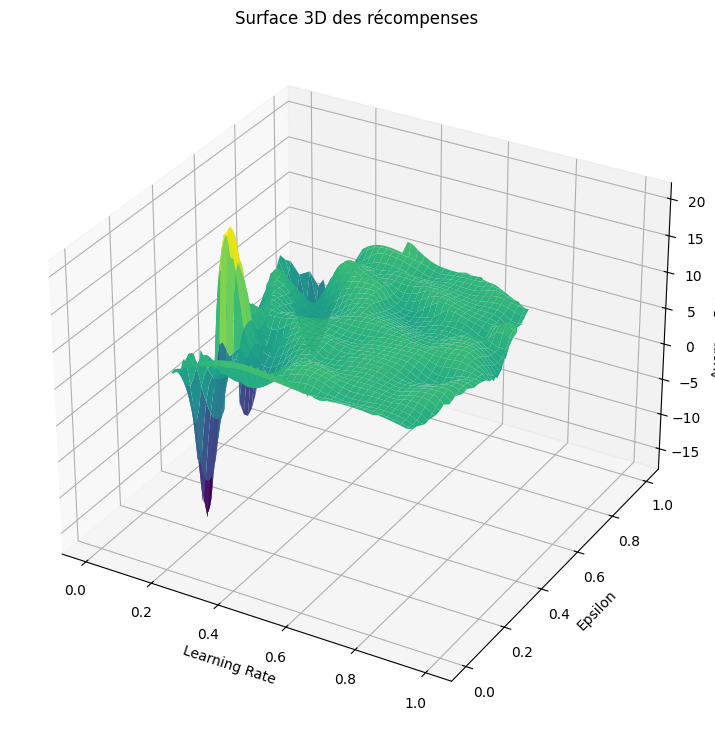

In [28]:
points = np.array([[hp['learning_rate'], hp['epsilon']] for hp in hyper_params_list])
values = np.array([hp['avg_rewards'] for hp in hyper_params_list])

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]
grid_z = griddata(points[:, :2], values, (grid_x, grid_y), method='cubic')


fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Average Reward')
plt.title("Surface 3D des récompenses")
plt.show()


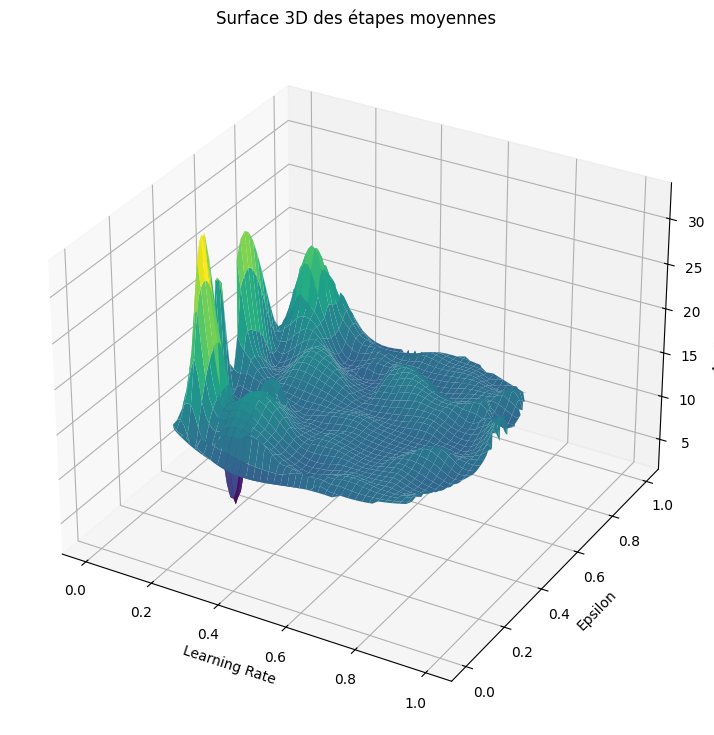

In [29]:
points = np.array([[hp['learning_rate'], hp['epsilon'], hp['discount_factor']] for hp in hyper_params_list])
values = np.array([hp['avg_steps'] for hp in hyper_params_list])

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]
grid_z = griddata(points[:, :2], values, (grid_x, grid_y), method='cubic')


fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Average Steps')
plt.title("Surface 3D des étapes moyennes")
plt.show()

In [30]:
hyper_params_list_not_varying = []
with open('data/e.json') as f:
    hyper_params_list_not_varying = json.load(f)

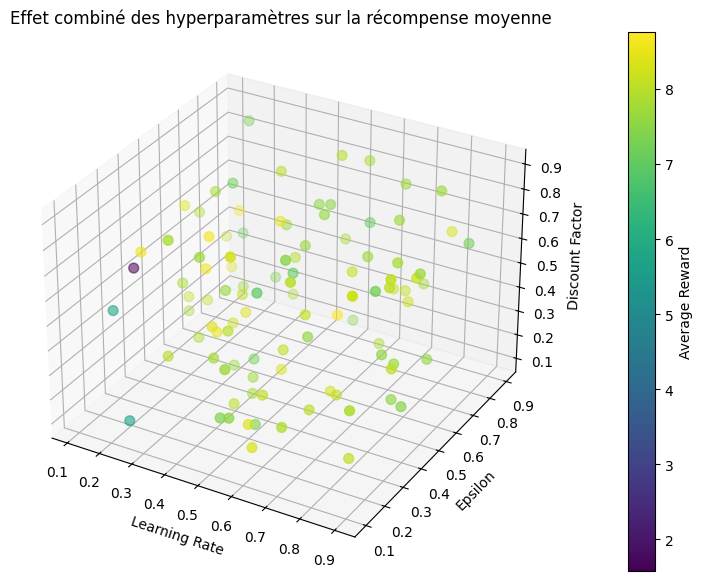

In [31]:
learning_rates = [hp['learning_rate'] for hp in hyper_params_list_not_varying]
epsilons = [hp['epsilon'] for hp in hyper_params_list_not_varying]
gammas = [hp['discount_factor'] for hp in hyper_params_list_not_varying]
avg_rewards = [hp['avg_rewards'] for hp in hyper_params_list_not_varying]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(learning_rates, epsilons, gammas, c=avg_rewards, cmap='viridis', s=50)

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Average Reward')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Discount Factor')
ax.set_title('Effet combiné des hyperparamètres sur la récompense moyenne')

plt.show()

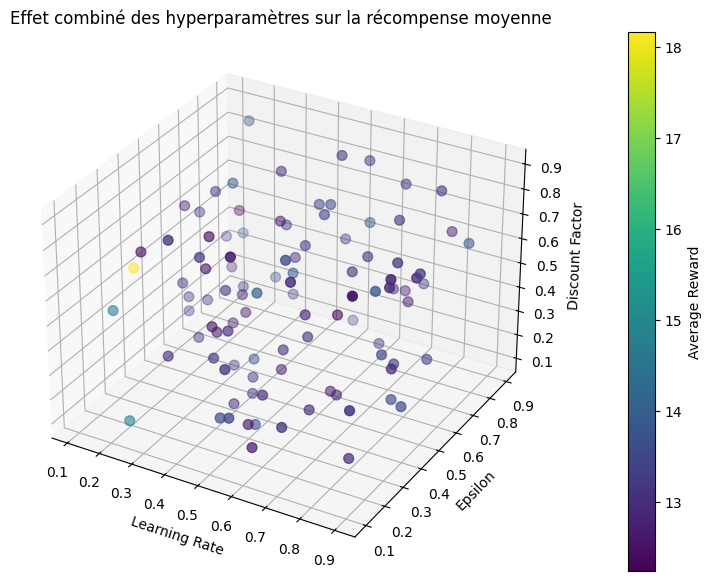

In [32]:
learning_rates = [hp['learning_rate'] for hp in hyper_params_list_not_varying]
epsilons = [hp['epsilon'] for hp in hyper_params_list_not_varying]
gammas = [hp['discount_factor'] for hp in hyper_params_list_not_varying]
avg_steps = [hp['avg_steps'] for hp in hyper_params_list_not_varying]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(learning_rates, epsilons, gammas, c=avg_steps, cmap='viridis', s=50)

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Average Reward')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Discount Factor')
ax.set_title('Effet combiné des hyperparamètres sur la récompense moyenne')

plt.show()

In [33]:
df = pd.DataFrame(hyper_params_list_not_varying)

df_sorted = df.sort_values(by="avg_rewards", ascending=False)

top_10 = df_sorted.head(10)
print("Top 10 combinaisons selon la récompense moyenne :\n")
print(top_10.to_string(index=False))

Top 10 combinaisons selon la récompense moyenne :

 learning_rate  epsilon  min_epsilon  decay_rate  discount_factor  avg_steps  avg_rewards
          0.62     0.56         0.01        0.01             0.42      12.24         8.76
          0.18     0.80         0.01        0.01             0.53      12.32         8.68
          0.32     0.41         0.01        0.01             0.72      12.34         8.66
          0.29     0.44         0.01        0.01             0.56      12.40         8.60
          0.16     0.33         0.01        0.01             0.65      12.42         8.58
          0.34     0.41         0.01        0.01             0.34      12.48         8.52
          0.39     0.66         0.01        0.01             0.65      12.50         8.50
          0.38     0.32         0.01        0.01             0.44      12.60         8.40
          0.11     0.63         0.01        0.01             0.63      12.60         8.40
          0.49     0.49         0.01        0.01 

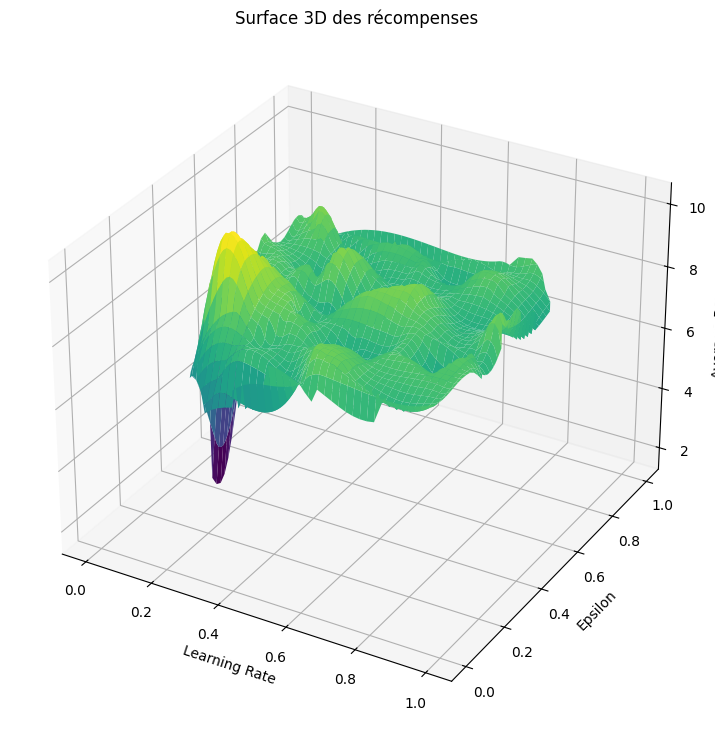

In [34]:
points = np.array([[hp['learning_rate'], hp['epsilon'], hp['discount_factor']] for hp in hyper_params_list_not_varying])
values = np.array([hp['avg_rewards'] for hp in hyper_params_list_not_varying])

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]
grid_z = griddata(points[:, :2], values, (grid_x, grid_y), method='cubic')


fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Average Reward')
plt.title("Surface 3D des récompenses")
plt.show()

In [2]:
best_params = []
with open('data/taxi_optimized_hyperparams2.json') as f:
    best_params = json.load(f)

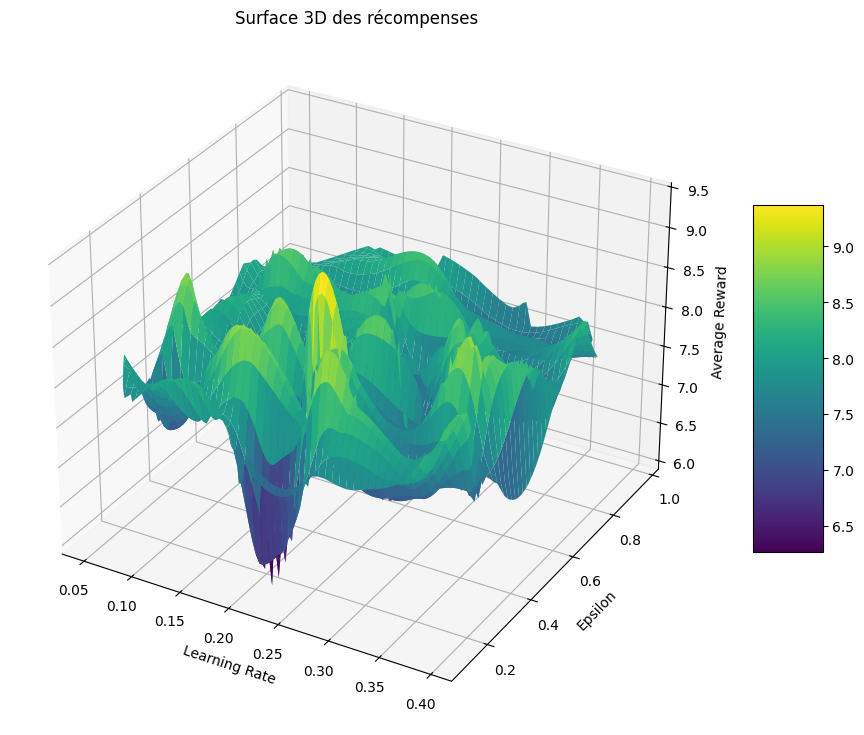

In [3]:
points = np.array([[hp['learning_rate'], hp['epsilon']] for hp in best_params])
values = np.array([hp['avg_rewards'] for hp in best_params])

x_min, x_max = points[:, 0].min(), points[:, 0].max()
y_min, y_max = points[:, 1].min(), points[:, 1].max()

grid_x, grid_y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')

fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', edgecolor='none')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Average Reward')
plt.title("Surface 3D des récompenses")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

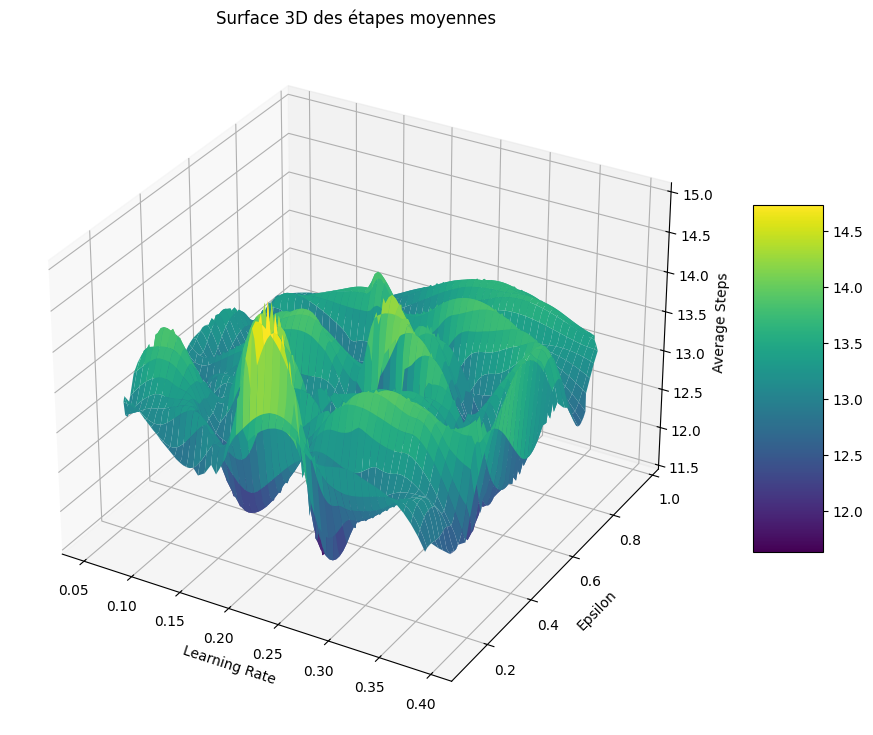

In [4]:
points = np.array([[hp['learning_rate'], hp['epsilon']] for hp in best_params])
values = np.array([hp['avg_steps'] for hp in best_params])

x_min, x_max = points[:, 0].min(), points[:, 0].max()
y_min, y_max = points[:, 1].min(), points[:, 1].max()

grid_x, grid_y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')

fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', edgecolor='none')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Average Steps')
plt.title("Surface 3D des étapes moyennes")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

In [5]:
best = max(best_params, key=lambda x: (x["avg_rewards"]))

In [6]:
best

{'learning_rate': 0.37,
 'epsilon': 0.388,
 'min_epsilon': 0.01,
 'epsilon_decay': 0.9964,
 'discount_factor': 0.907,
 'train_episodes': 15000,
 'avg_steps': 12.34,
 'avg_rewards': 8.66,
 'performance_score': 8.4132}

In [7]:
df = pd.DataFrame(best_params)

df_sorted = df.sort_values(by="avg_rewards", ascending=False)

top_10 = df_sorted.head(10)
print("Top 10 combinaisons selon la récompense moyenne :\n")
print(top_10.to_string(index=False))

Top 10 combinaisons selon la récompense moyenne :

 learning_rate  epsilon  min_epsilon  epsilon_decay  discount_factor  train_episodes  avg_steps  avg_rewards  performance_score
         0.370    0.388         0.01         0.9964            0.907           15000      12.34         8.66             8.4132
         0.226    0.631         0.01         0.9961            0.961           15000      12.34         8.66             8.4132
         0.091    0.345         0.01         0.9955            0.964           15000      12.38         8.62             8.3724
         0.390    0.257         0.01         0.9922            0.940           15000      12.52         8.48             8.2296
         0.386    0.238         0.01         0.9902            0.990           15000      12.52         8.48             8.2296
         0.194    0.190         0.01         0.9938            0.985           15000      12.54         8.46             8.2092
         0.215    0.651         0.01         0.9961  